In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('C:\\Users\\SHUBHAM\\OneDrive\\Documents\\insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# EDA & VISUALIZATION

In [3]:
df.shape

(1338, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
df.columns.tolist()

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

Text(0.5, 1.0, 'Correlation In Variables')

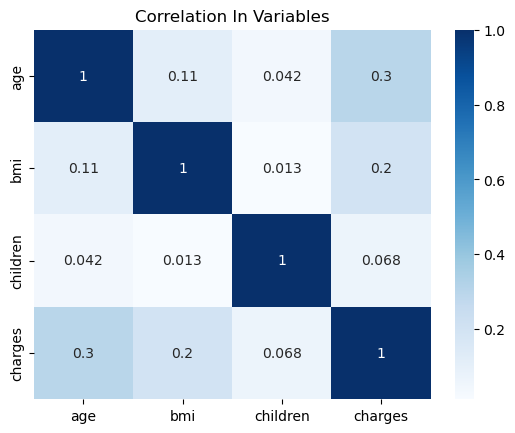

In [9]:
cor=df.corr()
sns.heatmap(cor,cmap='Blues',annot=True)
plt.title('Correlation In Variables')
 

In [10]:
 #Thier no correlation among valiables.

C:\Users\SHUBHAM\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\SHUBHAM\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution Of Insurance Charges in log Scale ')

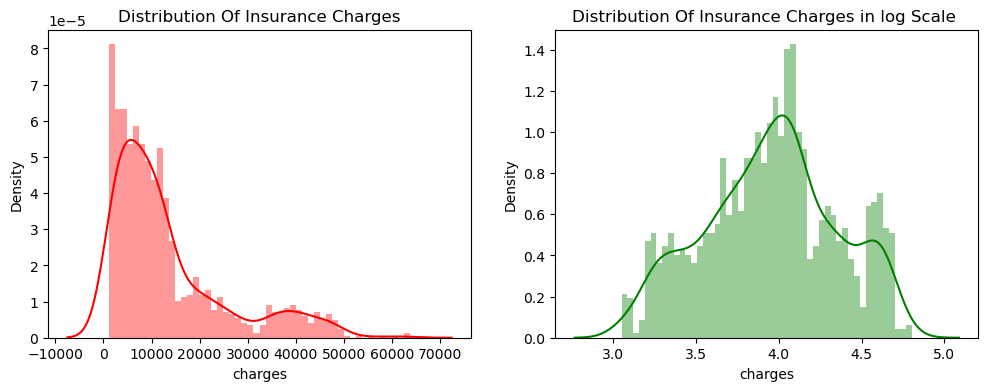

In [11]:

f=plt.figure(figsize=(12,4))
ax=f.add_subplot(121)
sns.distplot(df['charges'],color='r',bins=50,ax=ax)
plt.title('Distribution Of Insurance Charges')

ax=f.add_subplot(122)
sns.distplot(np.log10(df['charges']),color='g',bins=50,ax=ax)
plt.title('Distribution Of Insurance Charges in log Scale ')

In [12]:
#the charges is right skewed,we apply natural log on variables.

# Regionwise Insurance Charges 

Text(0.5, 1.0, 'Regionwise Insurance Charges by Smoker')

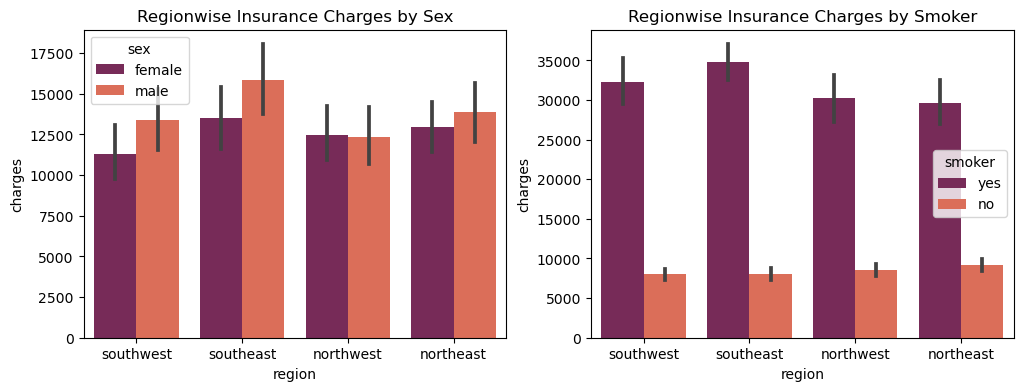

In [13]:
f=plt.figure(figsize=(12,4))
ax=f.add_subplot(121)
sns.barplot(x='region', y='charges', hue='sex', data=df, palette='rocket', ax=ax)
plt.title('Regionwise Insurance Charges by Sex')

ax=f.add_subplot(122)
sns.barplot(x='region', y='charges', hue='smoker', data=df, palette='rocket', ax=ax)
plt.title('Regionwise Insurance Charges by Smoker')

 

# Insurance Charges By Age

Text(0.5, 1.0, 'Agewise Insurance Charges by Smoker')

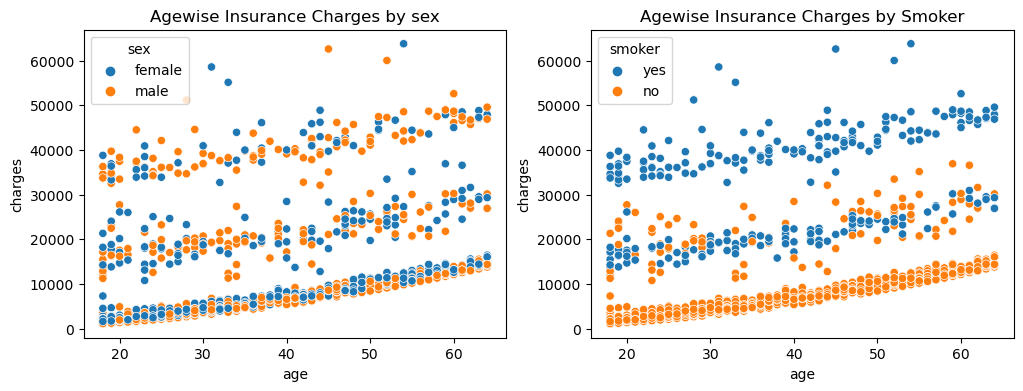

In [14]:
f=plt.figure(figsize=(12,4))
ax=f.add_subplot(121)
sns.scatterplot(x='age',y='charges',data=df,hue='sex',ax=ax)
plt.title('Agewise Insurance Charges by sex')

ax=f.add_subplot(122)
sns.scatterplot(x='age',y='charges',data=df,hue='smoker',ax=ax)
plt.title('Agewise Insurance Charges by Smoker')

 

# Insurance Charges By BMI

Text(0.5, 1.0, 'BMIwise Charges By Smoker')

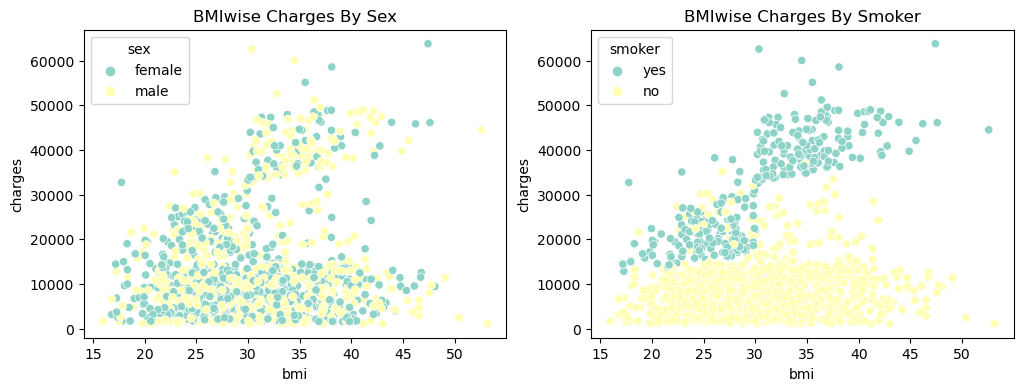

In [15]:
f=plt.figure(figsize=(12,4))
ax=f.add_subplot(121)
sns.scatterplot(x='bmi',y='charges',hue='sex',data=df,palette='Set3',ax=ax)
plt.title('BMIwise Charges By Sex')

ax=f.add_subplot(122)
sns.scatterplot(x='bmi',y='charges',hue='smoker',data=df,palette='Set3',ax=ax)
plt.title('BMIwise Charges By Smoker')

# Insurance Charges Of Those Who Having childern

Text(0.5, 1.0, 'Insurance Charges Of Those Who Having childern by Smoker')

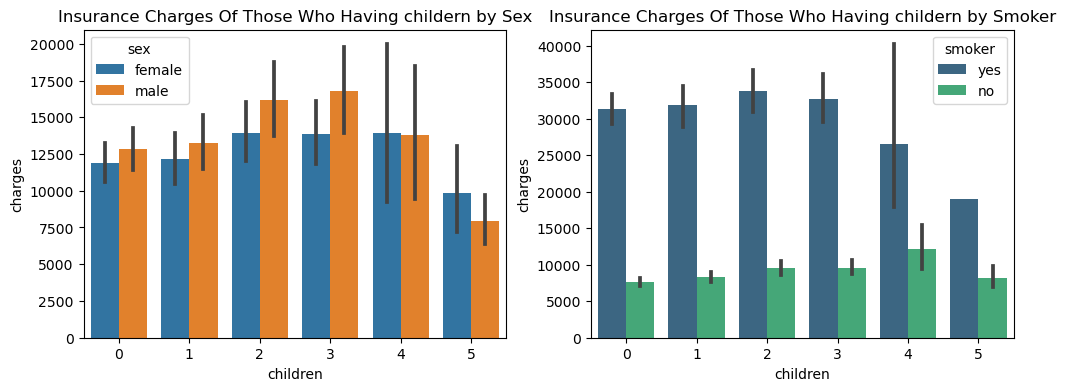

In [16]:
f=plt.figure(figsize=(12,4))
ax=f.add_subplot(121)
sns.barplot(x='children', y='charges', hue='sex', data=df, ax=ax)
plt.title('Insurance Charges Of Those Who Having childern by Sex')

ax=f.add_subplot(122)
sns.barplot(x='children', y='charges', hue='smoker', data=df, palette='viridis', ax=ax)
plt.title('Insurance Charges Of Those Who Having childern by Smoker')


In [17]:
#Checking For outliers in data

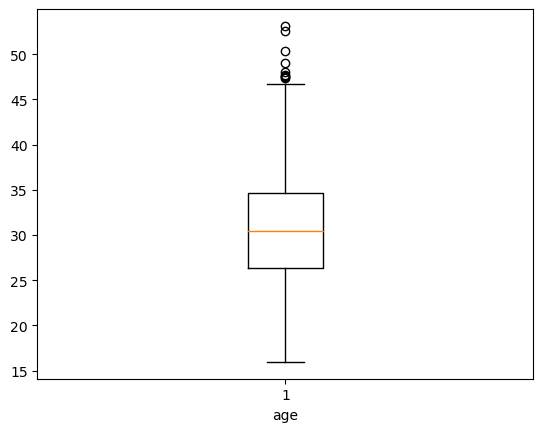

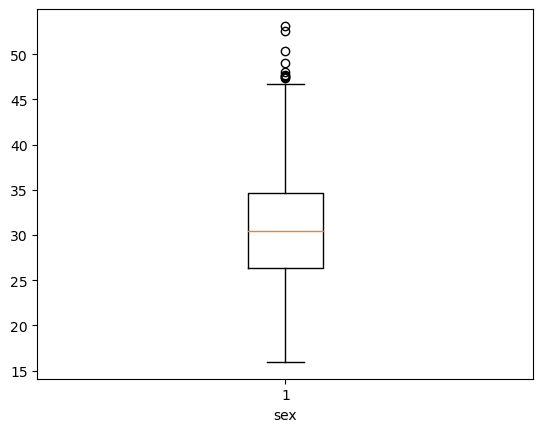

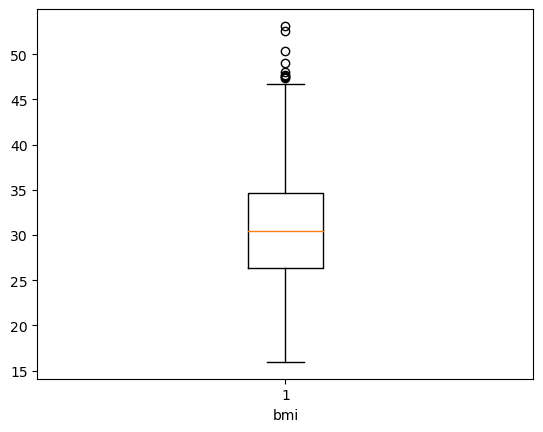

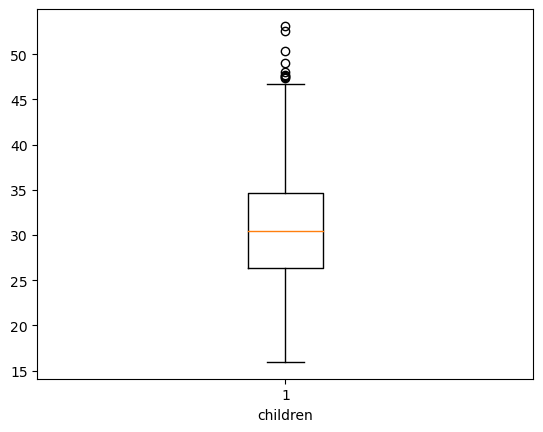

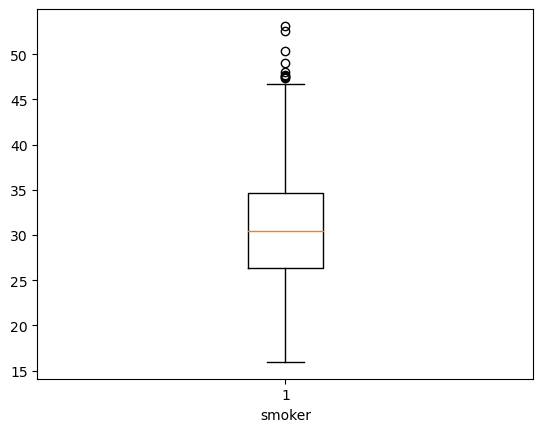

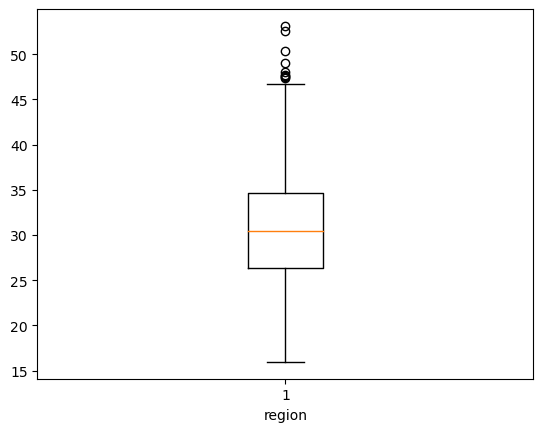

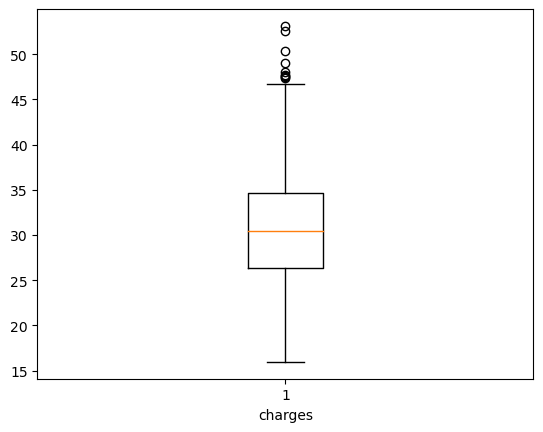

In [19]:
for i in df.columns:
    plt.boxplot(df['bmi'])
    plt.xlabel(i)
    plt.show()

In [ ]:
#We have outliers in BMI veriable,We will treat outliers with IQR method

In [32]:
Q1=np.quantile(df['bmi'],0.25)
Q2=np.quantile(df['bmi'],0.50)
Q3=np.quantile(df['bmi'],0.75)
IQR=Q3-Q1

Lower_fence=Q1-(1.5*IQR)
Upper_fence=Q3-(1.5*IQR)

#Removing Outliers from bmi variable

df=df.loc[(df['bmi']<Upper_fence)&(df['bmi']>Lower_fence)]

print('IQR=',IQR)
print("Lower fence=",Lower_fence)
print("Upper fence=",Upper_fence)

IQR= 8.3975
Lower fence= 13.7
Upper fence= 22.0975


In [33]:
#Encoding


In [34]:
df=pd.get_dummies(df,drop_first=True)

In [35]:
df.head(2)

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
28,23,17.385,1,2775.19215,1,0,1,0,0
35,19,20.425,0,1625.43375,1,0,1,0,0


In [36]:
df.columns.tolist()

['age',
 'bmi',
 'children',
 'charges',
 'sex_male',
 'smoker_yes',
 'region_northwest',
 'region_southeast',
 'region_southwest']

In [37]:
#Separating Independant & dependant Variable


In [38]:
x=df.drop('charges',axis=1)
y=df['charges']

# Model Building

In [39]:
#train Test Split

In [40]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=20)

In [41]:
from sklearn.metrics import mean_squared_error , r2_score

# Linear Regression

In [42]:
from sklearn.linear_model import LinearRegression

#linear Regression:
Lr= LinearRegression()
Lr.fit(x_train,y_train)

#Prediction:
y_pred= Lr.predict(x_test)

#Scores
print('Training=',Lr.score(x_train,y_train))
print('Testing=',Lr.score(x_test,y_test))
print('R2 value=',r2_score(y_test,y_pred))
print('Mean Squared Error=',mean_squared_error(y_test,y_pred))
    

Training= 0.7812020402060952
Testing= 0.8900813569430346
R2 value= 0.8900813569430346
Mean Squared Error= 4074507.174705445


# Ridge Regression

In [43]:
from sklearn.linear_model import Ridge
Ridge=Ridge()
Ridge=Ridge.fit(x_train,y_train)

#Prediction:
y_pred=Ridge.predict(x_test)

#Scores:
print('Training=',Ridge.score(x_train,y_train))
print('Testing=',Ridge.score(x_test,y_test))
print('R2 value=',r2_score(y_test,y_pred)) 
print('Mean Squared Error=',mean_squared_error(y_test,y_pred))


Training= 0.7778107094278821
Testing= 0.8795412760063246
R2 value= 0.8795412760063246
Mean Squared Error= 4465211.009871461


# Lasso Regression

In [44]:
from sklearn.linear_model import Lasso
Lasso=Lasso()
Lasso=Lasso.fit(x_train,y_train)

#Prediction:
y_pred=Lasso.predict(x_test)

#Scores:
print('Training=',Lasso.score(x_train,y_train))
print('Testing=',Lasso.score(x_test,y_test))
print('R2 value=',r2_score(y_test,y_pred))
print('Mean Squared Error=',mean_squared_error(y_test,y_pred))

Training= 0.7812013146913479
Testing= 0.8901793785018258
R2 value= 0.8901793785018258
Mean Squared Error= 4070873.6732950993
